In [ ]:

# Installiere Ultralytics (falls noch nicht vorhanden)
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 15.1 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OC1w5MMsOvtMMyW92Jp7")
project = rf.workspace("taleb-alhassan-kiofa").project("hrw_relevant")
version = project.version(7)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to HRW_Relevant-7 in yolov8:: 100%|██████████| 2694/2694 [00:00<00:00, 3462.33it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import random

# Funktion zum Mischen der Dateien in einem Ordner
def shuffle_files(image_dir, label_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])
    label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

    # Überprüfen, ob die Anzahl der Bilder und Labels gleich ist
    assert len(image_files) == len(label_files), "Die Anzahl der Bilder und Labels stimmt nicht überein!"

    # Zufällige Reihenfolge erstellen
    indices = list(range(len(image_files)))
    random.shuffle(indices)

    # Dateien umbenennen
    for i, idx in enumerate(indices):
        new_image_name = f"{i:05d}.jpg"  # Benenne die Bilder um
        new_label_name = f"{i:05d}.txt"  # Benenne die Labels um

        os.rename(os.path.join(image_dir, image_files[idx]), os.path.join(image_dir, new_image_name))
        os.rename(os.path.join(label_dir, label_files[idx]), os.path.join(label_dir, new_label_name))

# Ordnerpfade definieren
train_image_dir = "/content/HRW_Relevant-7/train/images"
train_label_dir = "/content/HRW_Relevant-7/train/labels"

valid_image_dir = "/content/HRW_Relevant-7/valid/images"
valid_label_dir = "/content/HRW_Relevant-7/valid/labels"

test_image_dir = "/content/HRW_Relevant-7/test/images"
test_label_dir = "/content/HRW_Relevant-7/test/labels"

# Shuffle für Train, Valid, Test
shuffle_files(train_image_dir, train_label_dir)
shuffle_files(valid_image_dir, valid_label_dir)
shuffle_files(test_image_dir, test_label_dir)

print("Dateien erfolgreich gemischt!")

Dateien erfolgreich gemischt!


In [ ]:
from ultralytics import YOLO
import os

# YOLOv8 Modell laden (YOLOv8n für schnelles Training)
model = YOLO('yolov8n.pt')

# Trainieren des Modells mit Augmentierungen
model.train(
    data='/content/HRW_Relevant-7/data.yaml',  # Pfad zur data.yaml-Datei
    epochs=50,                         # Anzahl der Epochen
    batch=16,                          # Batch-Größe
    imgsz=640,                         # Bildgröße
    workers=2,                         # Anzahl der Worker
    augment=True,                      # Aktiviert Augmentierungen
    degrees=5.0,                       # Rotation
    translate=0.1,                     # Translation
    scale=0.5,                         # Skalierung
    hsv_h=0.015,                       # Farbtonanpassung
    hsv_s=0.7,                         # Sättigungsanpassung
    hsv_v=0.4,                         # Helligkeitsanpassung
    mosaic=1.0,                        # Mosaic-Augmentierung
    mixup=0.2,                         # MixUp-Augmentierung
    copy_paste=0.1,                    # CopyPaste-Augmentierung
    fliplr=0,
    flipud=0,  # Deaktiviert vertikales Spiegeln (für Verkehrszeichen meist nicht sinnvoll)# Horizontales Spiegeln
    project='/content/custom_training_results',  # Projektordner
    name='train0',           # Name des spezifischen Trainings
    val=True                            # Validierung nach jeder Epoche
)


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/HRW_Relevant-7/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=/content/custom_training_results, name=train02, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.2MB/s]


AMP: checks passed ✅


train: Scanning /content/HRW_Relevant-7/train/labels... 1006 images, 29 backgrounds, 0 corrupt: 100%|██████████| 1006/1006 [00:00<00:00, 1665.42it/s]

train: New cache created: /content/HRW_Relevant-7/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/HRW_Relevant-7/valid/labels... 202 images, 6 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1564.72it/s]

val: New cache created: /content/HRW_Relevant-7/valid/labels.cache


Plotting labels to /content/custom_training_results/train02/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/custom_training_results/train02
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.24G      1.241      4.274     0.9989         50        640: 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        202        380    0.00744      0.646      0.121     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G      1.143      2.955     0.9477         64        640: 100%|██████████| 63/63 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        202        380      0.282      0.352      0.278      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.19G      1.106      2.618     0.9513         70        640: 100%|██████████| 63/63 [00:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        202        380      0.347      0.545      0.301      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G      1.095      2.461     0.9512         34        640: 100%|██████████| 63/63 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


                   all        202        380       0.36       0.55      0.354       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.19G        1.1      2.268     0.9559         45        640: 100%|██████████| 63/63 [00:19<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        202        380      0.421      0.536      0.458      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G      1.107      2.062     0.9687         43        640: 100%|██████████| 63/63 [00:20<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        202        380      0.493      0.594      0.571      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.26G      1.067      1.919     0.9547         49        640: 100%|██████████| 63/63 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        202        380      0.706      0.588      0.685      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.16G      1.028      1.643     0.9491         39        640: 100%|██████████| 63/63 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        202        380      0.774      0.686      0.759      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G      1.047      1.549     0.9481         57        640: 100%|██████████| 63/63 [00:19<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        202        380      0.806      0.632      0.748      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G      1.003      1.415     0.9475         37        640: 100%|██████████| 63/63 [00:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        202        380      0.794      0.683      0.766      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.26G     0.9798      1.307     0.9459         79        640: 100%|██████████| 63/63 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        202        380       0.79      0.736      0.813      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.18G     0.9909      1.212     0.9345         31        640: 100%|██████████| 63/63 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        202        380      0.867      0.722      0.822      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.16G     0.9453      1.152     0.9317         39        640: 100%|██████████| 63/63 [00:19<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        202        380      0.875      0.746      0.843      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G     0.9539      1.106     0.9217         50        640: 100%|██████████| 63/63 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        202        380      0.884      0.742      0.838      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G     0.9402      1.079     0.9223         42        640: 100%|██████████| 63/63 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


                   all        202        380      0.879      0.768      0.847      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G     0.9641      1.052     0.9164         52        640: 100%|██████████| 63/63 [00:20<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]

                   all        202        380      0.886      0.758      0.843      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G     0.9405      1.012     0.9205         45        640: 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        202        380      0.876      0.738       0.85      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.17G     0.9202     0.9978     0.9232         41        640: 100%|██████████| 63/63 [00:19<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        202        380      0.874      0.738      0.847      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G     0.9235     0.9757     0.9169         47        640: 100%|██████████| 63/63 [00:19<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        202        380      0.894      0.766      0.843      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.18G     0.9385     0.9366     0.9149         56        640: 100%|██████████| 63/63 [00:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]

                   all        202        380      0.927      0.741       0.86      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.18G     0.8974     0.9243     0.9141         51        640: 100%|██████████| 63/63 [00:19<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]

                   all        202        380      0.889      0.797      0.871      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.16G      0.909     0.9038     0.9051         51        640: 100%|██████████| 63/63 [00:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]

                   all        202        380      0.931      0.767      0.874      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.26G     0.8729     0.8664     0.9108         55        640: 100%|██████████| 63/63 [00:18<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]

                   all        202        380      0.882      0.797      0.877      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.18G     0.8929     0.8809     0.9128         50        640: 100%|██████████| 63/63 [00:19<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        202        380      0.912      0.784      0.874      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G     0.8783     0.8509      0.902         50        640: 100%|██████████| 63/63 [00:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]

                   all        202        380      0.897      0.802      0.871      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G     0.8692     0.8353     0.8968         41        640: 100%|██████████| 63/63 [00:23<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        202        380      0.897      0.796      0.878      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.24G     0.8648     0.8166     0.8979         50        640: 100%|██████████| 63/63 [00:27<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        202        380      0.909      0.791      0.874      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G     0.8811     0.8197     0.9026         36        640: 100%|██████████| 63/63 [00:23<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


                   all        202        380      0.903      0.784       0.88      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G     0.8416      0.808     0.8956         39        640: 100%|██████████| 63/63 [00:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        202        380      0.895      0.782      0.883       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.18G     0.8596     0.7791      0.893         61        640: 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        202        380      0.926      0.789      0.871      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.27G     0.8707     0.8006     0.8964         27        640: 100%|██████████| 63/63 [00:25<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        202        380      0.882      0.807      0.875      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G     0.8335     0.7525     0.8943         31        640: 100%|██████████| 63/63 [00:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        202        380      0.916      0.797      0.884      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G     0.8524     0.7465       0.89         45        640: 100%|██████████| 63/63 [00:23<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        202        380      0.897      0.803      0.883       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.17G     0.8382     0.7545     0.8855         45        640: 100%|██████████| 63/63 [00:20<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        202        380      0.936      0.795      0.893      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.26G     0.8032     0.7341     0.8843         53        640: 100%|██████████| 63/63 [00:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        202        380      0.929      0.808      0.897       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.16G      0.813     0.7193     0.8878         69        640: 100%|██████████| 63/63 [00:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        202        380      0.908      0.819      0.897      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.16G     0.8113     0.7209     0.8825         57        640: 100%|██████████| 63/63 [00:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        202        380      0.908       0.81      0.893      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G     0.8043      0.711     0.8852         50        640: 100%|██████████| 63/63 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        202        380      0.881      0.824      0.894      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.26G     0.8105     0.6971     0.8843         41        640: 100%|██████████| 63/63 [00:20<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]


                   all        202        380      0.931      0.784      0.893      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.18G      0.796     0.7086     0.8804         42        640: 100%|██████████| 63/63 [00:19<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        202        380      0.895      0.817      0.893      0.686


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.16G     0.7361     0.5904     0.8463         25        640: 100%|██████████| 63/63 [00:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


                   all        202        380      0.947      0.794      0.894      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.16G     0.7345     0.5761     0.8569         28        640: 100%|██████████| 63/63 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        202        380      0.914      0.811       0.89      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.24G     0.7208     0.5524     0.8493         28        640: 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]

                   all        202        380      0.923      0.804      0.889      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.16G     0.7448     0.5518     0.8456         32        640: 100%|██████████| 63/63 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]

                   all        202        380      0.904       0.81      0.889      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.16G     0.7042      0.531     0.8434         22        640: 100%|██████████| 63/63 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]

                   all        202        380      0.919      0.813      0.889      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.16G      0.706      0.535     0.8434         25        640: 100%|██████████| 63/63 [00:17<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        202        380      0.936      0.809      0.893      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G     0.7074     0.5234      0.844         28        640: 100%|██████████| 63/63 [00:17<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        202        380      0.925      0.813      0.894      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G     0.7051     0.5215     0.8404         25        640: 100%|██████████| 63/63 [00:17<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all        202        380      0.945      0.803      0.893      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.16G     0.6956      0.515     0.8457         31        640: 100%|██████████| 63/63 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        202        380      0.914      0.832      0.894      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G     0.6862     0.5204     0.8432         23        640: 100%|██████████| 63/63 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]

                   all        202        380      0.903      0.835      0.892      0.703



50 epochs completed in 0.327 hours.
Optimizer stripped from /content/custom_training_results/train02/weights/last.pt, 6.3MB
Optimizer stripped from /content/custom_training_results/train02/weights/best.pt, 6.3MB

Validating /content/custom_training_results/train02/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


                   all        202        380      0.702      0.787      0.701      0.542
        Abbiegen-links         37         39      0.507      0.898      0.526      0.459
       Abbiegen-rechts         45         46      0.524       0.87      0.595      0.521
        Trafic_light_G         34         65      0.817      0.686      0.785      0.504
        Trafic_light_R         31         48      0.706      0.562      0.665      0.415
   Trafic_light_Yellow         20         47      0.851      0.809      0.851      0.585
              geradaus         33         37      0.864      0.649      0.818      0.642
  geradeaus-oder-Links         37         38      0.627      0.973      0.717      0.645
 geradeaus-oder-rechts         29         29       0.42      0.931      0.502      0.442
             walkcross         16         31          1      0.704      0.848      0.667
Speed: 0.3ms preprocess, 10.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/c

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbf01bab070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [ ]:
# YOLO-Modell laden
from ultralytics import YOLO
model = YOLO('/content/custom_training_results/train02/weights/best.pt')  # Pfad zum trainierten Modell

# Validierung durchführen
model.val(
    data='/content/HRW_Relevant-7/data.yaml',  # Pfad zur data.yaml-Datei
    save_json=True,                     # Ergebnisse im COCO-Format speichern
    project='/content/custom_training_results',  # Hauptordner für Ergebnisse
    name='Valid_02'           # Name des Validierungsordners
)


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/HRW_Relevant-7/valid/labels.cache... 202 images, 6 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]


                   all        202        380      0.927      0.813      0.894      0.712
        Abbiegen-links         37         39      0.993      0.923      0.991      0.875
       Abbiegen-rechts         45         46      0.965       0.87       0.97      0.848
        Trafic_light_G         34         65        0.9      0.694      0.844      0.516
        Trafic_light_R         31         48      0.775      0.573       0.68      0.414
   Trafic_light_Yellow         20         47      0.884       0.83      0.871      0.605
              geradaus         33         37          1      0.722      0.864      0.706
  geradeaus-oder-Links         37         38      0.971          1      0.992      0.883
 geradeaus-oder-rechts         29         29      0.903      0.963      0.982      0.878
             walkcross         16         31      0.952      0.742      0.848      0.678
Speed: 0.4ms preprocess, 4.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Saving /content/custom_train

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbfd47e1270>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

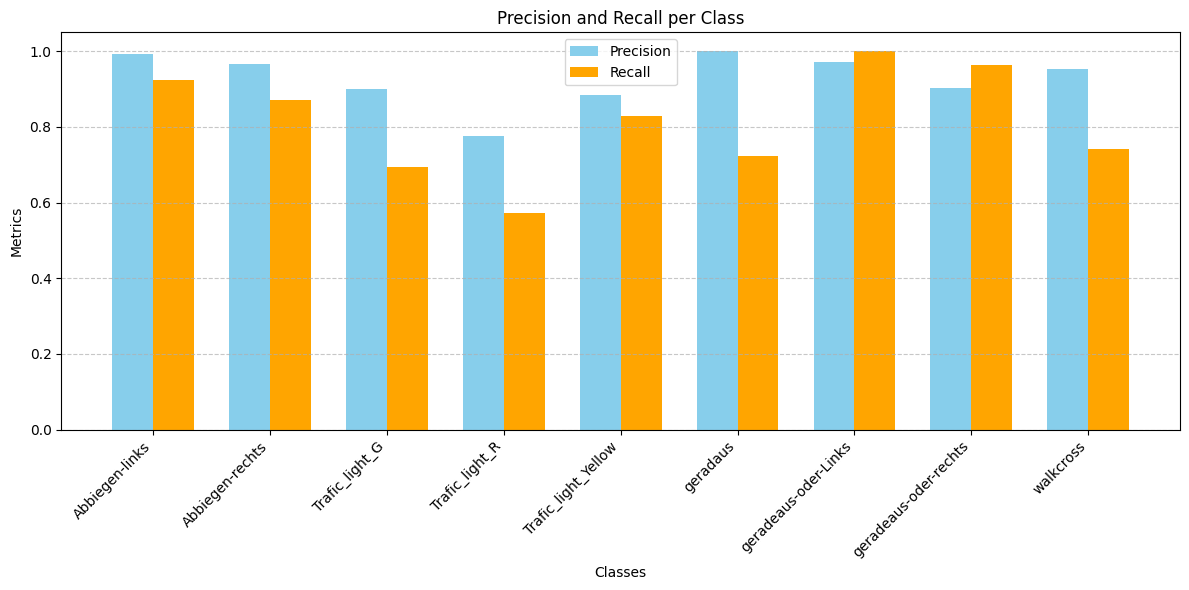

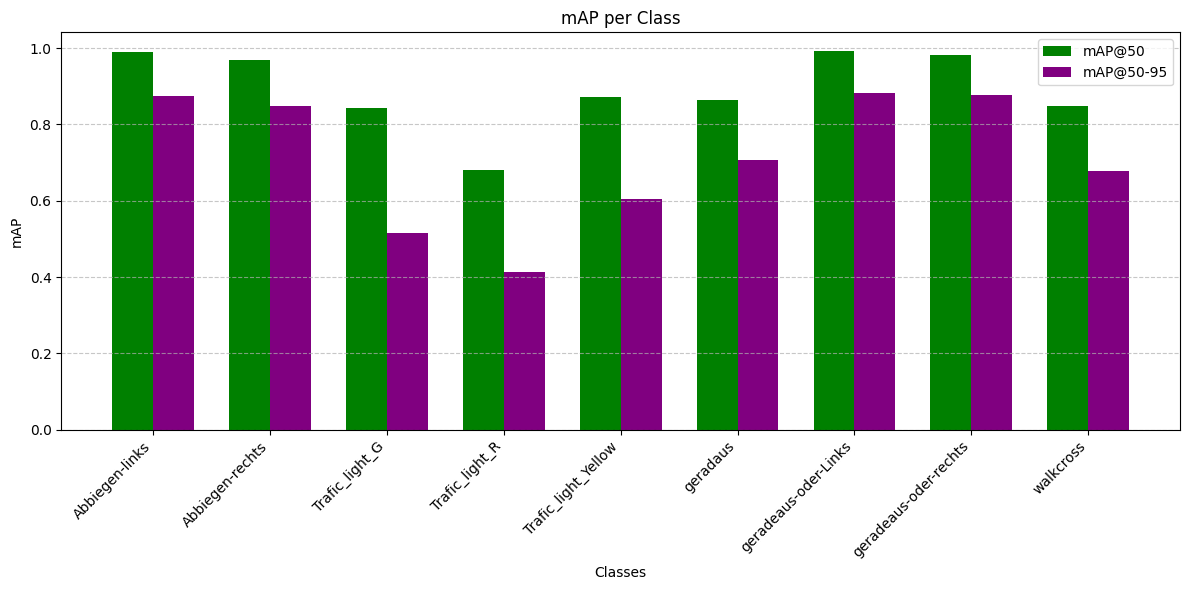

Gesamtleistung:
Precision (all): 0.927
Recall (all): 0.813
mAP@50 (all): 0.894
mAP@50-95 (all): 0.712


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Validierungsergebnisse manuell eingeben (basierend auf Ihrer Ausgabe)
classes = [
    "Abbiegen-links", "Abbiegen-rechts", "Trafic_light_G",
    "Trafic_light_R", "Trafic_light_Yellow", "geradaus",
    "geradeaus-oder-Links", "geradeaus-oder-rechts", "walkcross"
]
precision = [0.993, 0.965, 0.9, 0.775, 0.884, 1.0, 0.971, 0.903, 0.952]
recall = [0.923, 0.87, 0.694, 0.573, 0.83, 0.722, 1.0, 0.963, 0.742]
map50 = [0.991, 0.97, 0.844, 0.68, 0.871, 0.864, 0.992, 0.982, 0.848]
map50_95 = [0.875, 0.848, 0.516, 0.414, 0.605, 0.706, 0.883, 0.878, 0.678]

# 1. Precision und Recall plotten
x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, precision, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall, width, label='Recall', color='orange')
plt.xlabel("Classes")
plt.ylabel("Metrics")
plt.title("Precision and Recall per Class")
plt.xticks(x, classes, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 2. mAP50 und mAP50-95 plotten
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, map50, width, label='mAP@50', color='green')
plt.bar(x + width/2, map50_95, width, label='mAP@50-95', color='purple')
plt.xlabel("Classes")
plt.ylabel("mAP")
plt.title("mAP per Class")
plt.xticks(x, classes, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Gesamtleistung ausgeben
print("Gesamtleistung:")
print(f"Precision (all): {0.927}")
print(f"Recall (all): {0.813}")
print(f"mAP@50 (all): {0.894}")
print(f"mAP@50-95 (all): {0.712}")


In [ ]:
# Test durchführen
results = model.predict(
    source='/content/HRW_Relevant-7/test/images',  # Pfad zu Testbildern
    conf=0.25,                              # Mindestkonfidenz
    save=True,                              # Ergebnisse speichern
    project='/content/custom_training_results',  # Hauptordner
    name='test_02',                    # Name des Testordners
)



image 1/133 /content/HRW_Relevant-7/test/images/00000.jpg: 640x640 1 Abbiegen-rechts, 9.2ms
image 2/133 /content/HRW_Relevant-7/test/images/00001.jpg: 640x640 2 walkcrosss, 7.4ms
image 3/133 /content/HRW_Relevant-7/test/images/00002.jpg: 640x640 1 geradeaus-oder-rechts, 7.4ms
image 4/133 /content/HRW_Relevant-7/test/images/00003.jpg: 640x640 1 Abbiegen-links, 7.4ms
image 5/133 /content/HRW_Relevant-7/test/images/00004.jpg: 640x640 1 geradeaus-oder-Links, 7.4ms
image 6/133 /content/HRW_Relevant-7/test/images/00005.jpg: 640x640 1 geradeaus-oder-rechts, 7.4ms
image 7/133 /content/HRW_Relevant-7/test/images/00006.jpg: 640x640 1 Abbiegen-rechts, 7.4ms
image 8/133 /content/HRW_Relevant-7/test/images/00007.jpg: 640x640 1 Trafic_light_G, 8.4ms
image 9/133 /content/HRW_Relevant-7/test/images/00008.jpg: 640x640 1 Trafic_light_Yellow, 7.4ms
image 10/133 /content/HRW_Relevant-7/test/images/00009.jpg: 640x640 1 geradeaus-oder-rechts, 8.4ms
image 11/133 /content/HRW_Relevant-7/test/images/00010.jpg

Verfügbare Spalten in der Datei:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


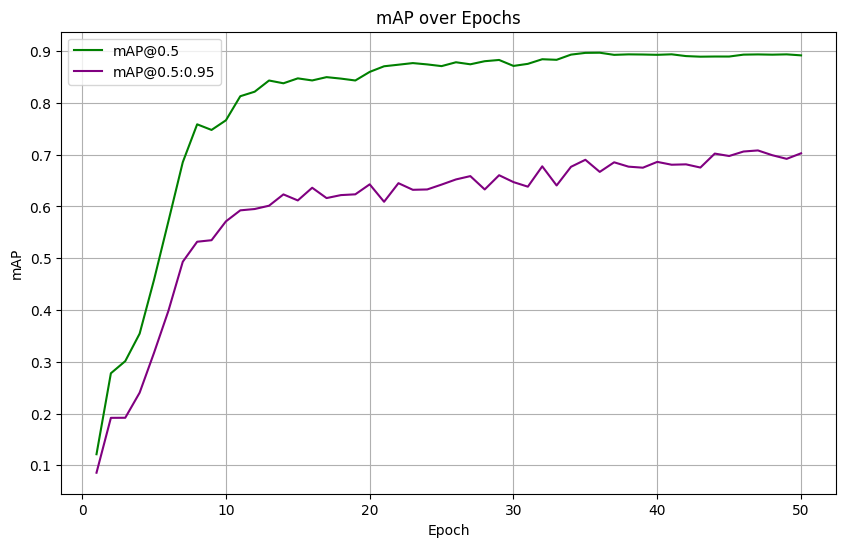

Letzte mAP-Werte:
mAP@0.5: 0.8917
mAP@0.5:0.95: 0.7026


In [ ]:
# Überprüfen der Spaltennamen
print("Verfügbare Spalten in der Datei:")
print(results.columns)

# Plots und Zusammenfassung nur, wenn die Spalten vorhanden sind
if 'metrics/mAP50(B)' in results.columns and 'metrics/mAP50-95(B)' in results.columns:
    # mAP50 und mAP50-95 plotten
    plt.figure(figsize=(10, 6))
    plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5', color='green')
    plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='purple')
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title("mAP over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

    # Letzte mAP-Werte ausgeben
    print("Letzte mAP-Werte:")
    print(f"mAP@0.5: {results['metrics/mAP50(B)'].iloc[-1]:.4f}")
    print(f"mAP@0.5:0.95: {results['metrics/mAP50-95(B)'].iloc[-1]:.4f}")
else:
    print("mAP-Daten (metrics/mAP50(B), metrics/mAP50-95(B)) sind nicht in der Datei enthalten.")


Verfügbare Spalten in der Datei:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


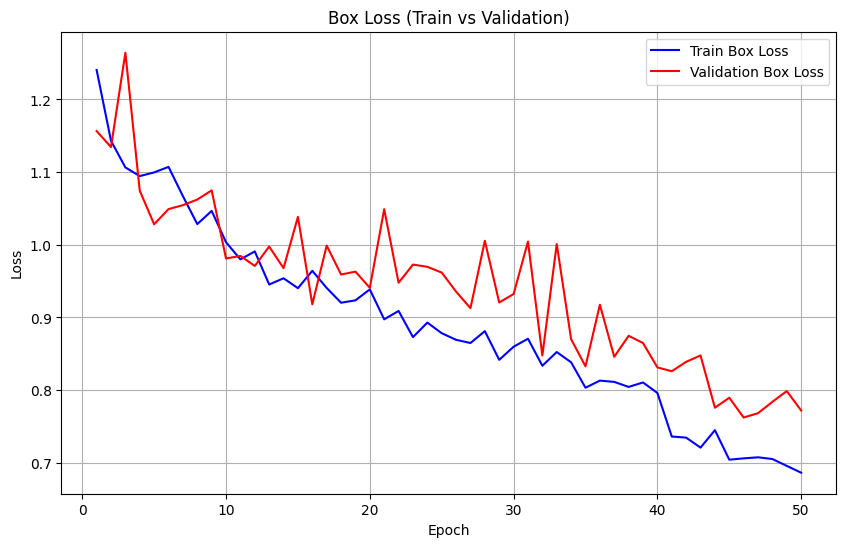

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zu Ihrem results.csv (Validierungs- oder Test-Ordner)
results_csv_path = '/content/custom_training_results/train02/results.csv'

# Ergebnisse laden
if not os.path.exists(results_csv_path):
    print(f"Die Datei {results_csv_path} wurde nicht gefunden.")
else:
    results = pd.read_csv(results_csv_path)

    # Überblick über die Daten
    print("Verfügbare Spalten in der Datei:")
    print(results.columns)

    # 1. Verlustkurven (train/box_loss, val/box_loss)
    if 'train/box_loss' in results.columns and 'val/box_loss' in results.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='blue')
        plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='red')
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Box Loss (Train vs Validation)")
        plt.legend()
        plt.grid()
        plt.show()

    # 2. mAP (metrics/mAP50 und metrics/mAP50-95)
    if 'metrics/mAP50' in results.columns and 'metrics/mAP50-95' in results.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(results['epoch'], results['metrics/mAP50'], label='mAP@0.5', color='green')
        plt.plot(results['epoch'], results['metrics/mAP50-95'], label='mAP@0.5:0.95', color='purple')
        plt.xlabel("Epoch")
        plt.ylabel("mAP")
        plt.title("mAP over Epochs")
        plt.legend()
        plt.grid()
        plt.show()

    # 3. Precision und Recall
    if 'metrics/precision' in results.columns and 'metrics/recall' in results.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(results['epoch'], results['metrics/precision'], label='Precision', color='orange')
        plt.plot(results['epoch'], results['metrics/recall'], label='Recall', color='brown')
        plt.xlabel("Epoch")
        plt.ylabel("Metrics")
        plt.title("Precision and Recall over Epochs")
        plt.legend()
        plt.grid()
        plt.show()



In [ ]:
from ultralytics import YOLO

# YOLOv8-Modell laden
model_path = '/content/custom_training_results/train02/weights/best.pt'  # Pfad zum trainierten Modell
model = YOLO(model_path)

# Exportieren des Modells in das ONNX-Format
model.export(format='onnx')  # Exportiert das Modell im ONNX-Format in den Standardordner

print("Das Modell wurde erfolgreich im ONNX-Format exportiert.")



Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/custom_training_results/train02/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 13, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 171.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 207.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 280.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 154.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 288.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 22.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or

In [ ]:
import shutil
from google.colab import files

# Verzeichnis mit den exportierten Dateien (ersetzen Sie dies durch Ihren Exportpfad)
export_path = '/content/custom_training_results'
zip_path = '/content/exported_model.zip'

# ZIP-Datei erstellen
shutil.make_archive(base_name='/content/exported_model', format='zip', root_dir=export_path)

# ZIP-Datei herunterladen
files.download(zip_path)

print(f"Die ZIP-Datei wurde erfolgreich erstellt und steht unter {zip_path} bereit.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Die ZIP-Datei wurde erfolgreich erstellt und steht unter /content/exported_model.zip bereit.
